In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns




from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.impute import KNNImputer



In [2]:
df = pd.read_csv("Sri Lankan CKD Dataset.csv")

In [3]:
df.head

<bound method NDFrame.head of       id   age  weight gender       cr       cru    al    gl     na    ca  \
0      1  72.0   52.00      M   249.43       NaN  34.9   NaN  142.0  2.43   
1      2  76.0   52.00      M   216.05       NaN  41.3   NaN  145.0  2.40   
2      3  60.0   80.40      M   155.40       NaN  33.7   NaN  135.0  2.00   
3      4  65.0   53.40      F   127.50       NaN  41.8   NaN  138.0  2.80   
4      5  59.0   60.40      M   172.71       NaN  39.7   NaN  128.0  2.20   
..   ...   ...     ...    ...      ...       ...   ...   ...    ...   ...   
401  402  48.0   48.00      M  1167.62       NaN   NaN   NaN  134.0   NaN   
402  403  46.0   55.00      M   211.20       NaN  37.2  37.9  144.0  2.40   
403  404  55.0   54.85      F   164.43  10302.37  22.2  48.9  129.0   NaN   
404  405  84.0   43.90      M   501.71       NaN   NaN   NaN  135.0   NaN   
405  406  38.0   60.50      M   880.64   3810.53  38.5  32.1  127.0   NaN   

       k     cl    pr  iron     ua   wbc   rb

In [4]:
df.isnull().sum().sum()

2769

In [5]:
for i in df.columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "id":
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 24

In [6]:
df['pr'].unique()

array([      nan, 1.160e+01, 8.900e+00, 1.090e+01, 7.770e+01, 7.530e+01,
       7.140e+01, 1.300e+00, 8.100e+00, 1.000e+00, 2.200e+00, 3.800e+00,
       5.460e+01, 5.300e+00, 2.200e+01, 7.120e+01, 8.260e+01, 8.430e+01,
       7.600e+00, 1.000e-01, 3.000e-01, 4.870e+01, 1.200e+00, 8.350e+01,
       5.870e+01, 7.410e+01, 6.620e+01, 7.110e+01, 6.490e+01, 8.700e+01,
       9.000e-01, 5.000e-01, 2.320e+01, 3.200e+00, 1.500e+00, 7.160e+01,
       1.700e+00, 3.900e+00, 3.800e+01, 6.440e+01, 7.370e+01, 6.100e+01,
       7.180e+01, 7.610e+01, 1.840e+01, 1.326e+01, 7.010e+01, 7.910e+01,
       7.130e+01, 6.930e+01, 5.800e+01, 6.000e-01, 5.240e+01, 5.740e+01,
       1.658e+02, 6.520e+01, 2.000e-01, 4.340e+01, 8.620e+01, 3.910e+01,
       4.900e+00, 1.753e+02, 6.650e+01, 7.510e+01, 7.060e+01])

In [7]:
a= {"M":1,"F":0}

df["gender"]=df["gender"].map(a)

In [8]:
df.head()

,id,age,weight,gender,cr,cru,al,gl,na,ca,k,cl,pr,iron,ua,wbc,rbc,hg,plt,class
0,1,72.0,52.0,1,249.43,NaN,34.9,NaN,142.0,2.43,5.0,113.0,NaN,NaN,415.8,NaN,NaN,NaN,NaN,1
1,2,76.0,52.0,1,216.05,NaN,41.3,NaN,145.0,2.40,4.7,114.0,NaN,13.0,NaN,9.85,3.44,11.3,356.0,1
2,3,60.0,80.4,1,155.40,NaN,33.7,NaN,135.0,2.00,4.2,103.0,11.6,12.0,NaN,9.24,4.60,8.4,329.0,1
3,4,65.0,53.4,0,127.50,NaN,41.8,NaN,138.0,2.80,4.4,100.0,NaN,NaN,290.7,9.87,4.32,11.7,364.0,1
4,5,59.0,60.4,1,172.71,NaN,39.7,NaN,128.0,2.20,3.6,91.0,NaN,NaN,367.8,8.93,4.82,13.8,214.0,1


In [9]:
df.isnull().sum()

id          0
age         1
weight      4
gender      0
cr         16
cru       380
al        199
gl        334
na         40
ca        315
k          39
cl        193
pr        330
iron      384
ua        382
wbc        40
rbc        43
hg         33
plt        36
class       0
dtype: int64

In [10]:
missing_values_per_row = df.isnull().sum(axis=1)

print("Number of Missing Values per Row:")
print(missing_values_per_row)

Number of Missing Values per Row:
0      8
1      4
2      3
3      4
4      4
      ..
401    7
402    3
403    3
404    7
405    1
Length: 406, dtype: int64


In [11]:
rows_per_missing_values = missing_values_per_row.value_counts().sort_index()

print("\nNumber of Rows for Each Count of Missing Values:")
print(rows_per_missing_values)


Number of Rows for Each Count of Missing Values:
1       1
2       8
3      23
4      25
5      54
6      47
7     124
8      69
9       9
10     19
11     13
12      3
13      1
14      2
15      8
dtype: int64


In [12]:
threshold = 10
filtered_data = df[missing_values_per_row <= threshold]

print("\nFiltered DataFrame:")
print(filtered_data)
filtered_data.shape



Filtered DataFrame:
      id   age  weight  gender       cr       cru    al    gl     na    ca  \
0      1  72.0   52.00       1   249.43       NaN  34.9   NaN  142.0  2.43   
1      2  76.0   52.00       1   216.05       NaN  41.3   NaN  145.0  2.40   
2      3  60.0   80.40       1   155.40       NaN  33.7   NaN  135.0  2.00   
3      4  65.0   53.40       0   127.50       NaN  41.8   NaN  138.0  2.80   
4      5  59.0   60.40       1   172.71       NaN  39.7   NaN  128.0  2.20   
..   ...   ...     ...     ...      ...       ...   ...   ...    ...   ...   
401  402  48.0   48.00       1  1167.62       NaN   NaN   NaN  134.0   NaN   
402  403  46.0   55.00       1   211.20       NaN  37.2  37.9  144.0  2.40   
403  404  55.0   54.85       0   164.43  10302.37  22.2  48.9  129.0   NaN   
404  405  84.0   43.90       1   501.71       NaN   NaN   NaN  135.0   NaN   
405  406  38.0   60.50       1   880.64   3810.53  38.5  32.1  127.0   NaN   

       k     cl    pr  iron     ua   wbc  

(379, 20)

In [13]:
from sklearn.metrics import mean_squared_error

k_values = range(2, 11)

train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42)

results = []

for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    imputed_test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)
    
    mse = mean_squared_error(test_data.fillna(0), imputed_test_data)
    
    results.append({'k': k, 'mse': mse})

results_df = pd.DataFrame(results)
top_k_values = results_df.sort_values(by='mse').head(3)

print("Results for Different K Values:")
print(results_df)

print("\nTop 3 K Values:")
print(top_k_values)

Results for Different K Values:
    k           mse
0   2  3.849710e+06
1   3  3.289100e+06
2   4  3.160610e+06
3   5  3.337957e+06
4   6  4.560601e+06
5   7  4.560322e+06
6   8  4.560323e+06
7   9  4.560326e+06
8  10  4.560317e+06

Top 3 K Values:
   k           mse
2  4  3.160610e+06
1  3  3.289100e+06
3  5  3.337957e+06


In [14]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=4)

x_1 = pd.DataFrame(knn_imputer.fit_transform(filtered_data), columns=filtered_data.columns)
x_1.isnull().sum()

id        0
age       0
weight    0
gender    0
cr        0
cru       0
al        0
gl        0
na        0
ca        0
k         0
cl        0
pr        0
iron      0
ua        0
wbc       0
rbc       0
hg        0
plt       0
class     0
dtype: int64

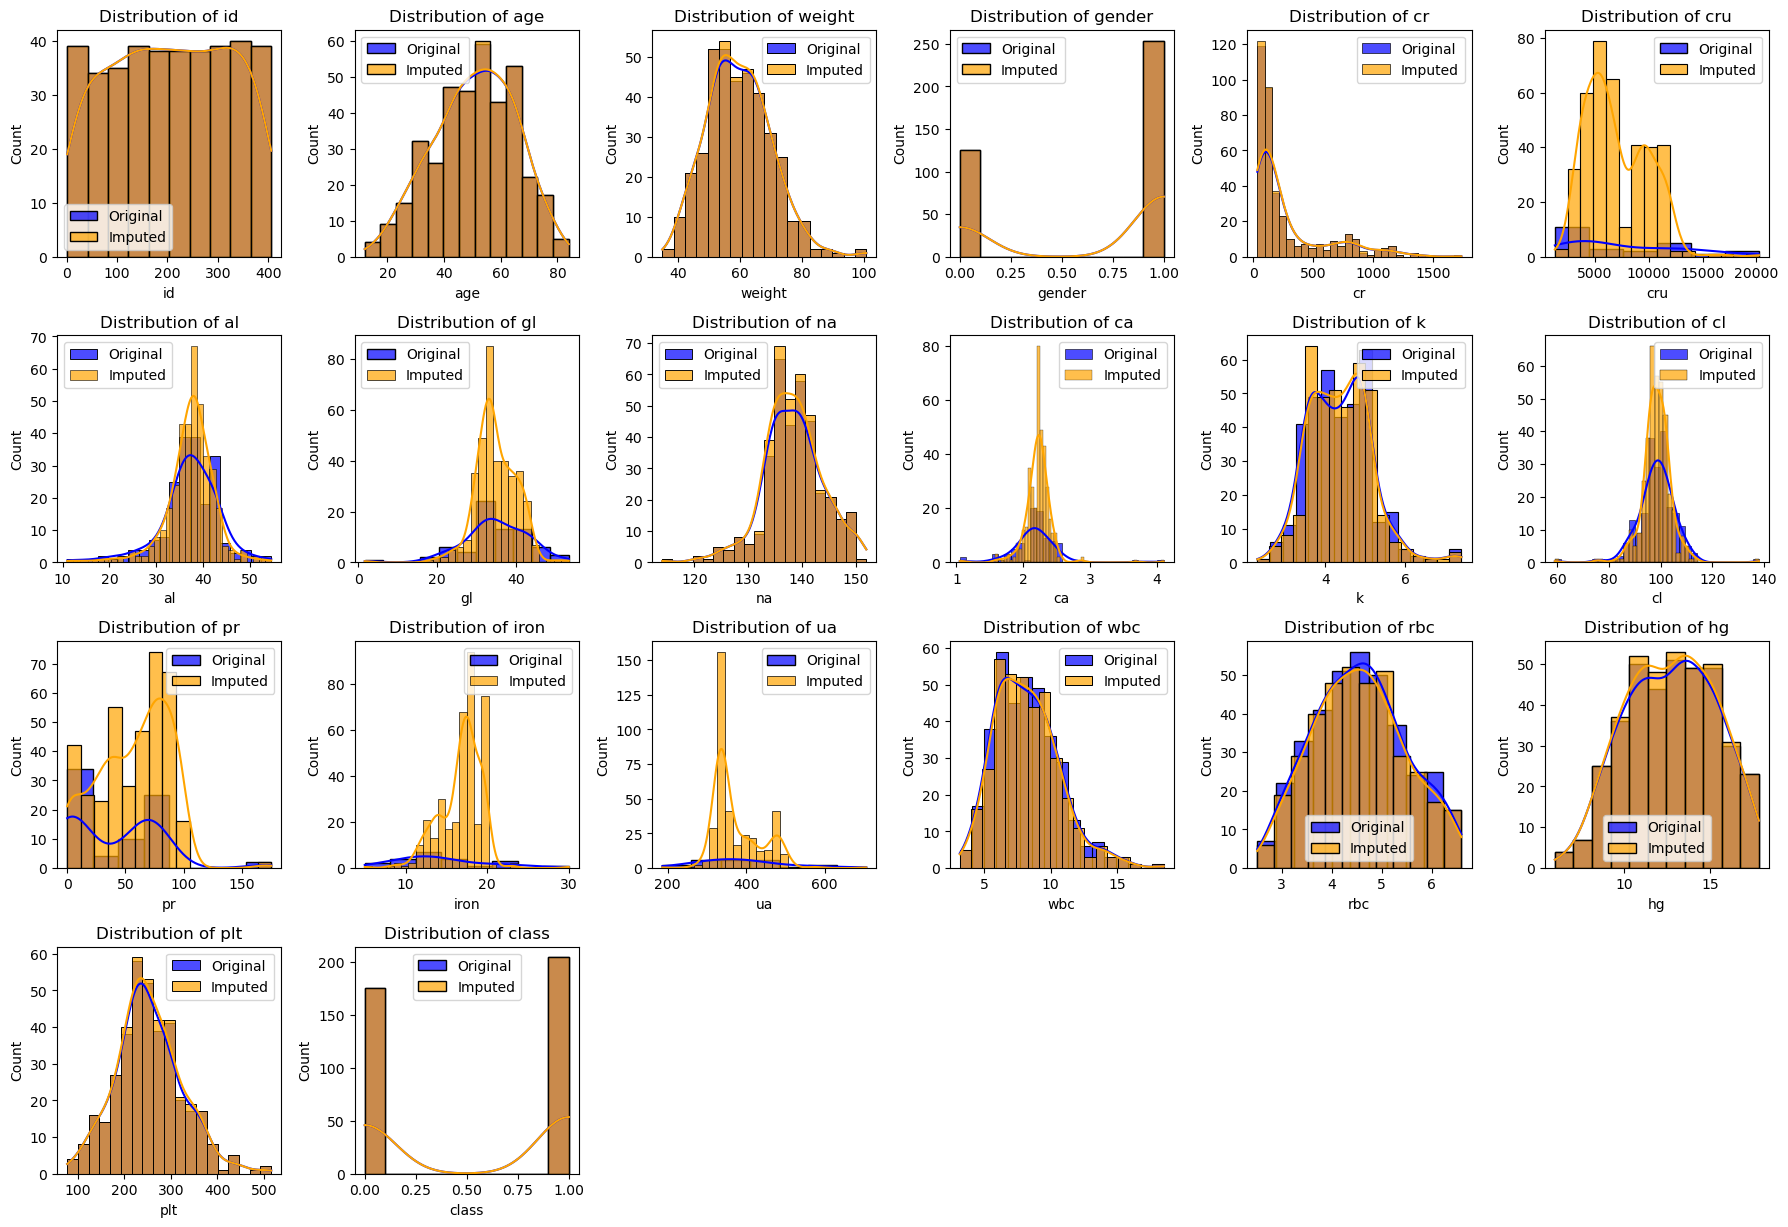

In [15]:
plt.figure(figsize=(18, 15))

for i, feature in enumerate(filtered_data.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(filtered_data[feature], kde=True, color='blue', label='Original', alpha=0.7)
    sns.histplot(x_1[feature], kde=True, color='orange', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

x_2 = pd.DataFrame(knn_imputer.fit_transform(filtered_data), columns=filtered_data.columns)
x_2.isnull().sum()

id        0
age       0
weight    0
gender    0
cr        0
cru       0
al        0
gl        0
na        0
ca        0
k         0
cl        0
pr        0
iron      0
ua        0
wbc       0
rbc       0
hg        0
plt       0
class     0
dtype: int64

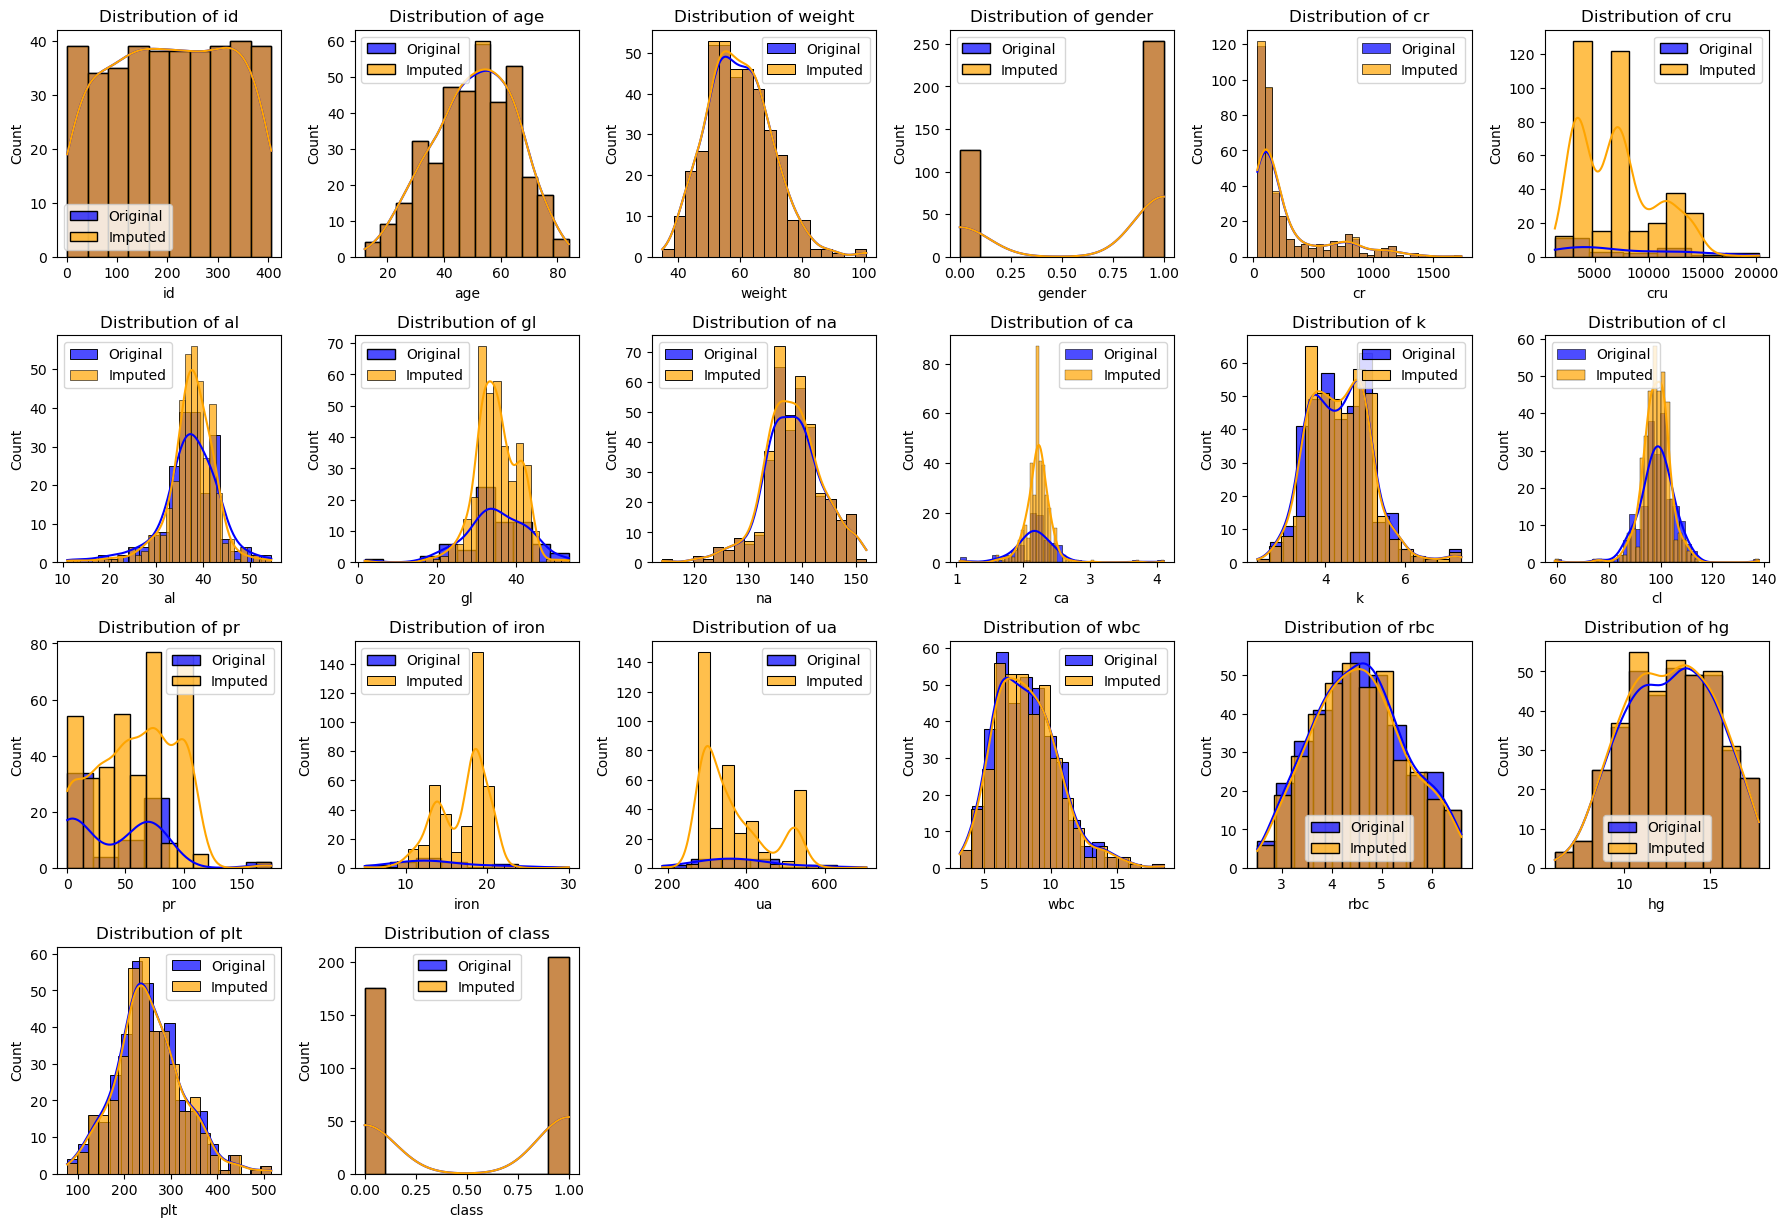

In [17]:
plt.figure(figsize=(18, 15))

for i, feature in enumerate(filtered_data.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(filtered_data[feature], kde=True, color='blue', label='Original', alpha=0.7)
    sns.histplot(x_2[feature], kde=True, color='orange', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [18]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

x_3 = pd.DataFrame(knn_imputer.fit_transform(filtered_data), columns=filtered_data.columns)
x_3.isnull().sum()

id        0
age       0
weight    0
gender    0
cr        0
cru       0
al        0
gl        0
na        0
ca        0
k         0
cl        0
pr        0
iron      0
ua        0
wbc       0
rbc       0
hg        0
plt       0
class     0
dtype: int64

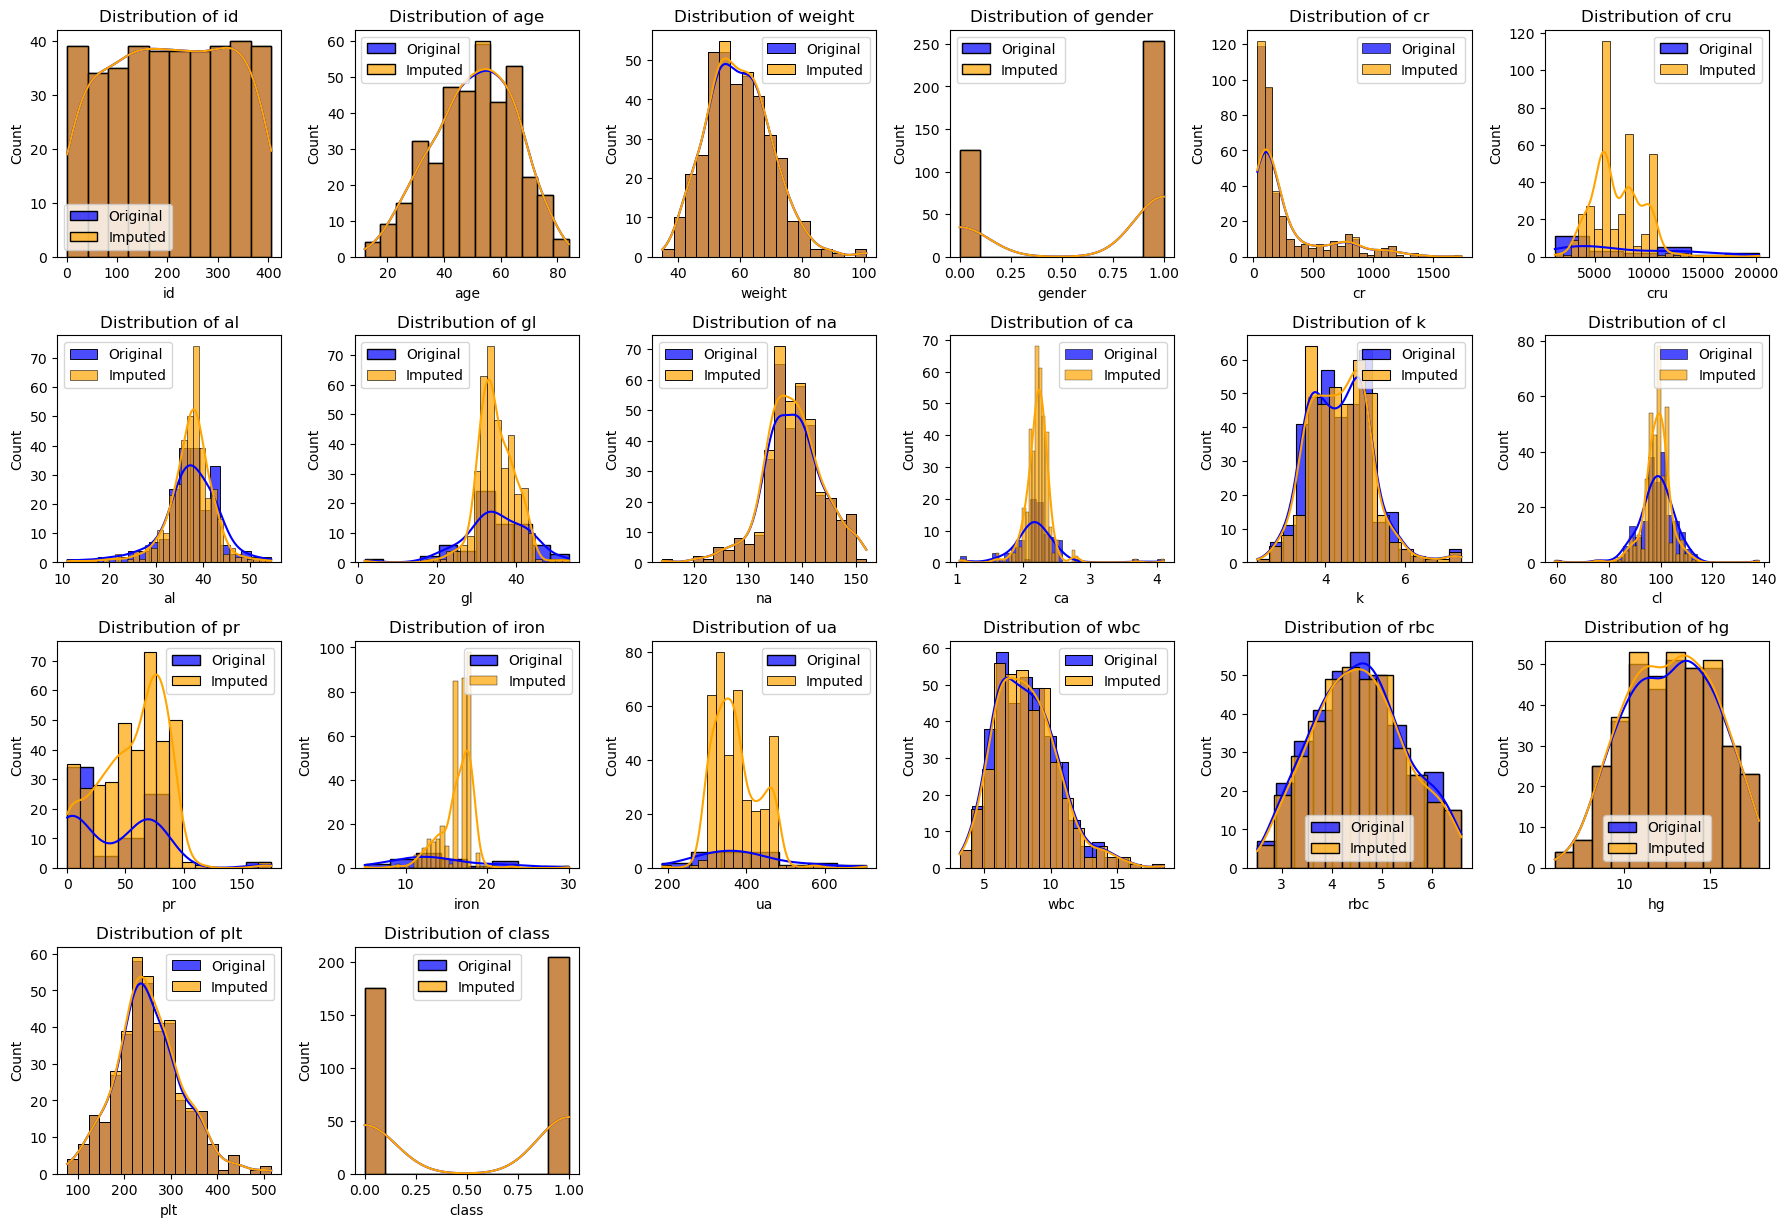

In [19]:
plt.figure(figsize=(18, 15))

for i, feature in enumerate(filtered_data.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(filtered_data[feature], kde=True, color='blue', label='Original', alpha=0.7)
    sns.histplot(x_3[feature], kde=True, color='orange', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

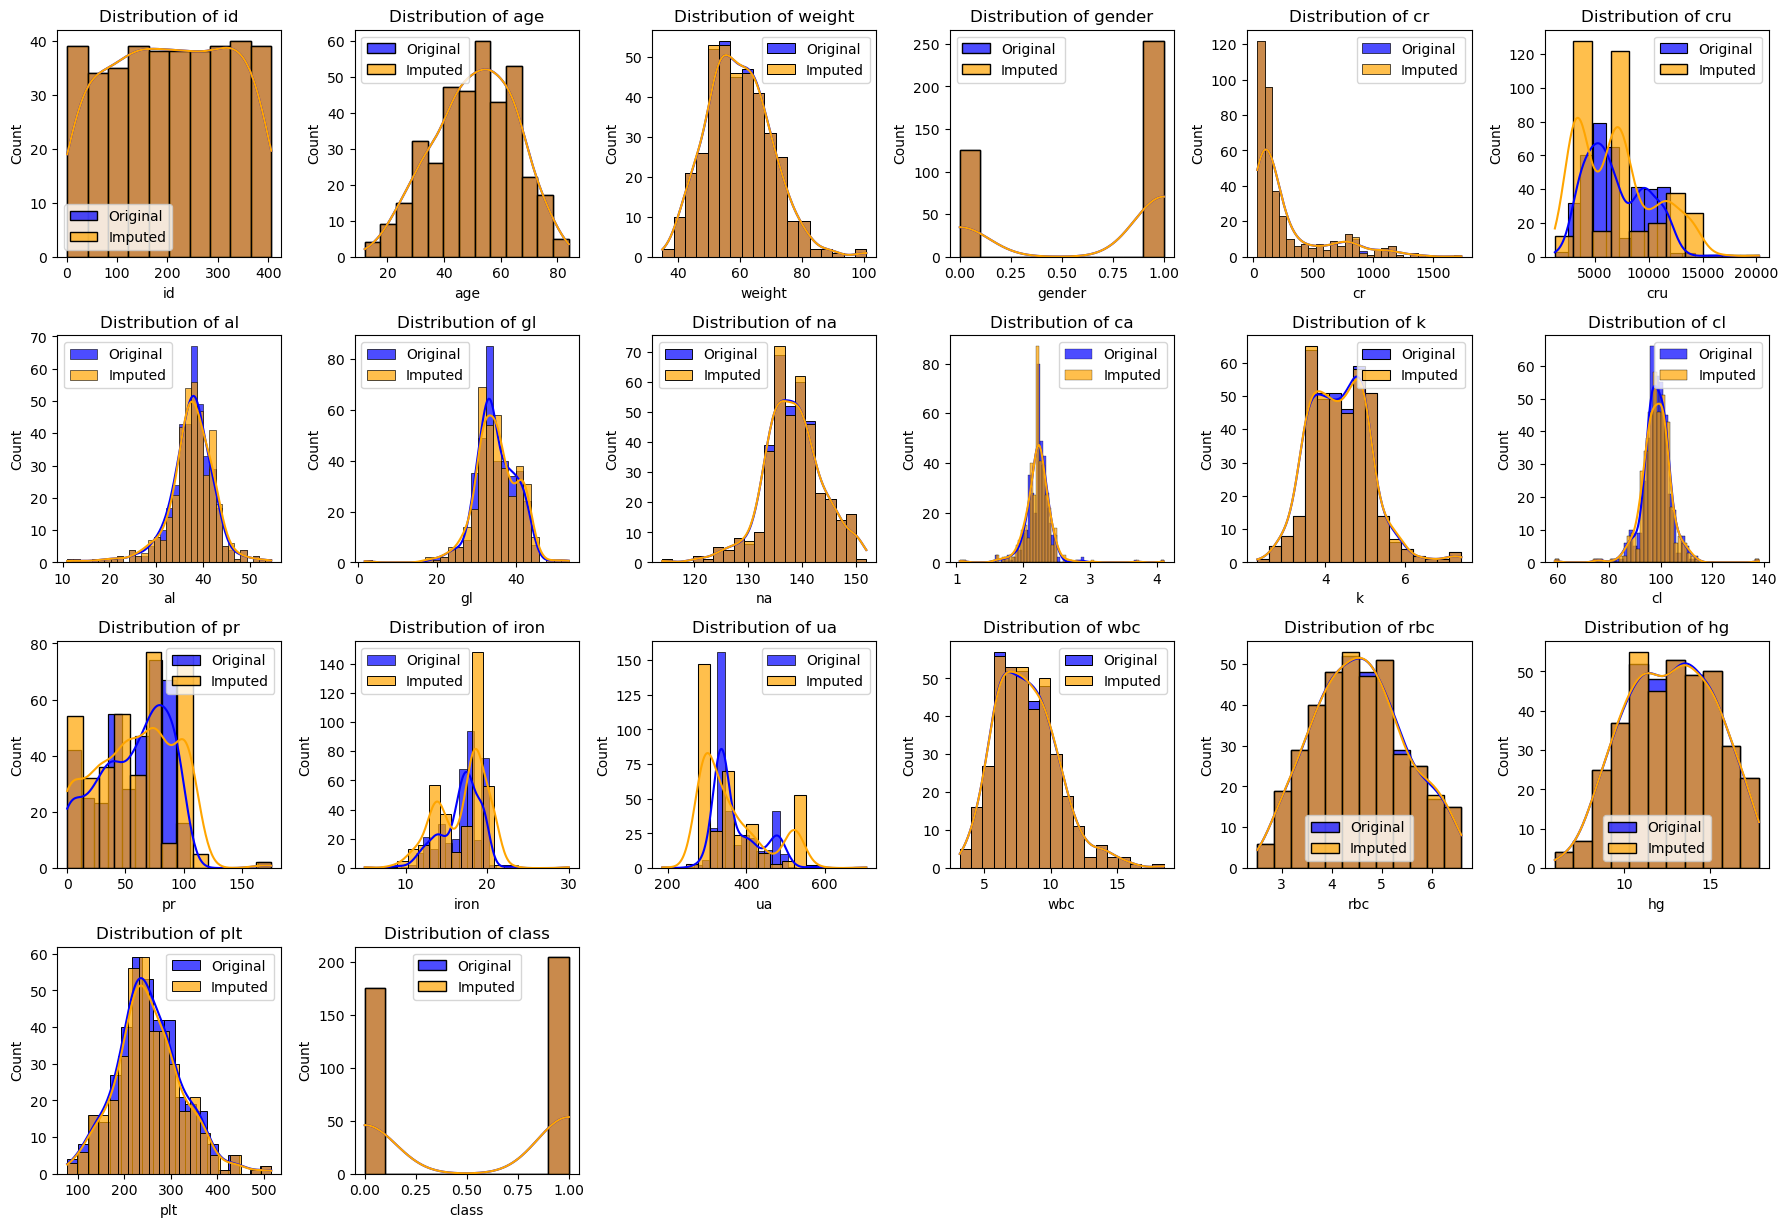

In [20]:
plt.figure(figsize=(18, 15))

for i, feature in enumerate(filtered_data.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(x_1[feature], kde=True, color='blue', label='Original', alpha=0.7)
    sns.histplot(x_2[feature], kde=True, color='orange', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# from sklearn.metrics import mean_squared_error

# column_name = 'age'

# # Check if the specified column exists in both DataFrames
# if column_name in x_1.columns and column_name in x_2.columns:
#     # Extract the specified column from each DataFrame
#     column_df1 = x_1[column_name]
#     column_df2 = x_2[column_name]

#     # Calculate the mean squared error
#     mse = mean_squared_error(column_df1, column_df2)

#     print(f"Mean Squared Error between {column_name} in df1 and df2: {mse}")
# else:
#     print(f"Column {column_name} not found in both DataFrames.")


# Mean square error between each imputed data

In [22]:
from sklearn.metrics import mean_squared_error

# Assuming df1, df2, and df3 are your DataFrames
# Replace 'column_name' with the actual column name you want to compare

# List of your DataFrames
dataframes = [x_1, x_2, x_3]

# Iterate over pairs of DataFrames
for i in range(len(dataframes)-1):
    for j in range(i+1, len(dataframes)):
        df1 = dataframes[i]
        df2 = dataframes[j]

        # Iterate over columns
        for column_name in df1.columns:
            # Check if the specified column exists in both DataFrames
            if column_name in df1.columns and column_name in df2.columns:
                # Extract the specified column from each DataFrame
                column_df1 = df1[column_name]
                column_df2 = df2[column_name]

                # Calculate the mean squared error
                mse = mean_squared_error(column_df1, column_df2)

                print(f"Mean Squared Error between {column_name} in df{i+1} and df{j+1}: {mse}")
            else:
                print(f"Column {column_name} not found in both DataFrames.")


Mean Squared Error between id in df1 and df2: 0.0
Mean Squared Error between age in df1 and df2: 0.00016490765171503957
Mean Squared Error between weight in df1 and df2: 0.05702048519495742
Mean Squared Error between gender in df1 and df2: 0.0
Mean Squared Error between cr in df1 and df2: 11.17443364357962
Mean Squared Error between cru in df1 and df2: 2364612.929807415
Mean Squared Error between al in df1 and df2: 0.9508632145998238
Mean Squared Error between gl in df1 and df2: 3.5696346452653183
Mean Squared Error between na in df1 and df2: 0.07646218117854024
Mean Squared Error between ca in df1 and df2: 0.006448931764878334
Mean Squared Error between k in df1 and df2: 0.0028074611550864825
Mean Squared Error between cl in df1 and df2: 2.1339050131926136
Mean Squared Error between pr in df1 and df2: 123.17582210495458
Mean Squared Error between iron in df1 and df2: 3.4827030196423334
Mean Squared Error between ua in df1 and df2: 1150.7302259234823
Mean Squared Error between wbc in d

# Plotted in graph

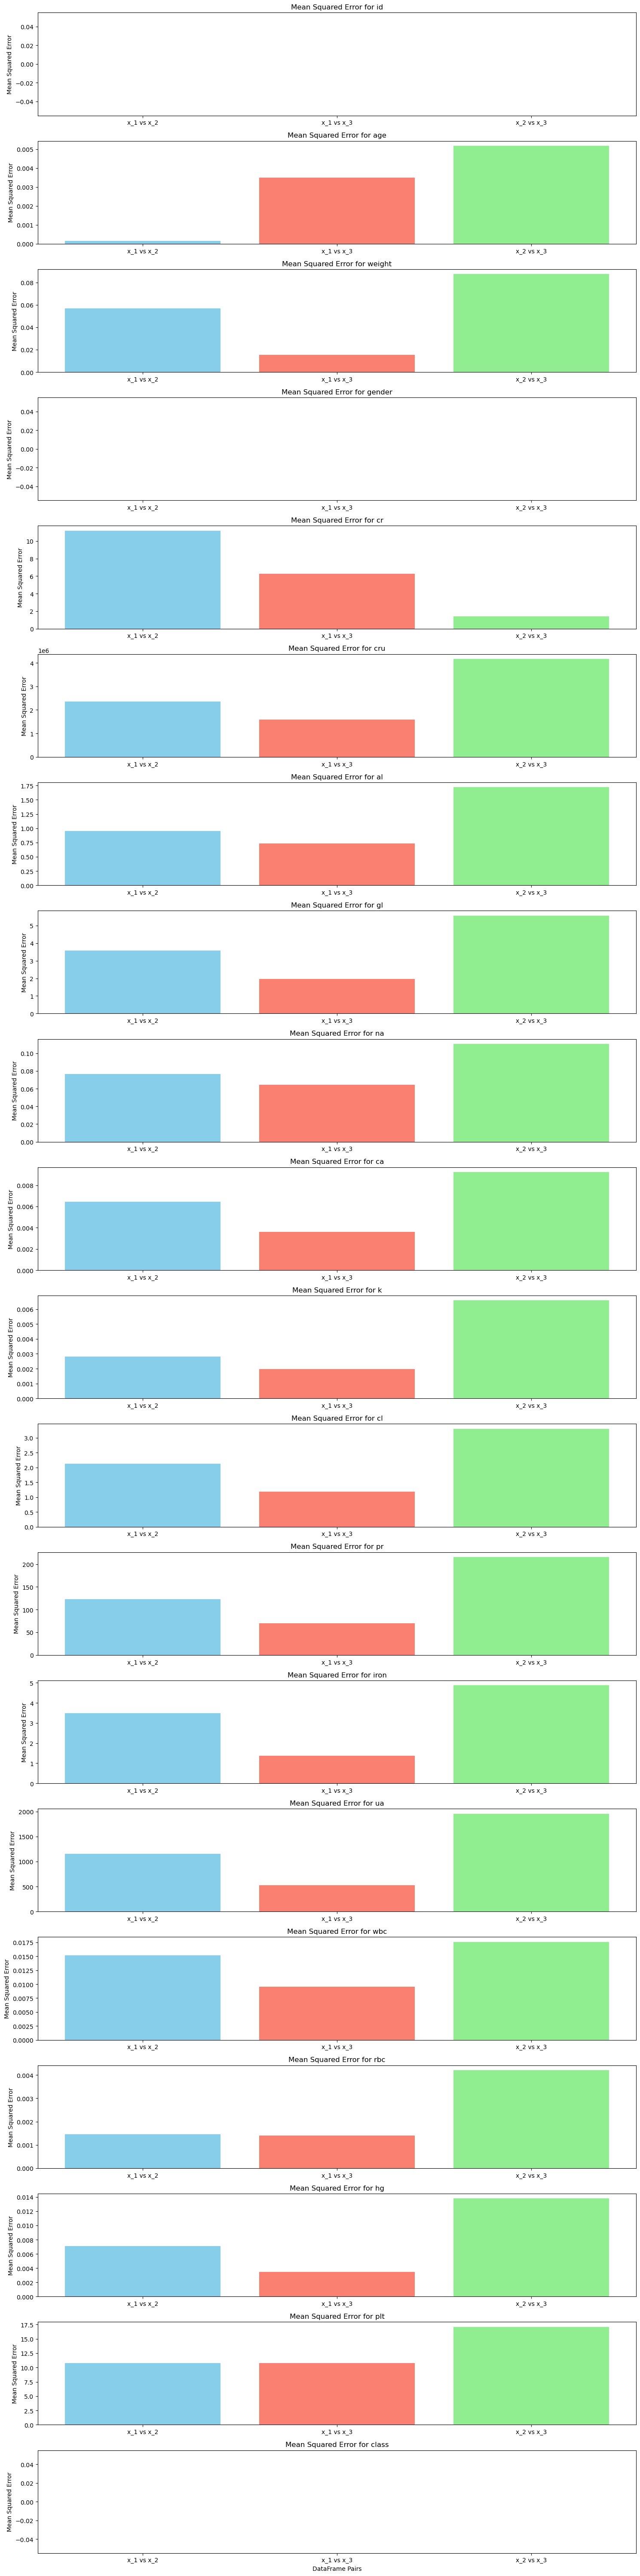

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# List of your DataFrames
dataframes = [x_1, x_2, x_3]

# Initialize lists to store feature names and corresponding mean squared errors
feature_names = x_1.columns
mse_values_x1_x2 = []
mse_values_x1_x3 = []
mse_values_x2_x3 = []

# Iterate over columns
for column_name in feature_names:
    # Check if the specified column exists in all DataFrames
    if all(column_name in df.columns for df in dataframes):
        # Extract the specified column from each DataFrame
        column_values = [df[column_name] for df in dataframes]

        # Calculate the mean squared errors
        mse_values_x1_x2.append(mean_squared_error(column_values[0], column_values[1]))
        mse_values_x1_x3.append(mean_squared_error(column_values[0], column_values[2]))
        mse_values_x2_x3.append(mean_squared_error(column_values[1], column_values[2]))
    else:
        print(f"Column {column_name} not found in all DataFrames.")

# Create separate bar plots for each feature
fig, axs = plt.subplots(len(feature_names), 1, figsize=(15, 3 * len(feature_names)))

for i, feature_name in enumerate(feature_names):
    axs[i].bar(['x_1 vs x_2', 'x_1 vs x_3', 'x_2 vs x_3'],
               [mse_values_x1_x2[i], mse_values_x1_x3[i], mse_values_x2_x3[i]],
               color=['skyblue', 'salmon', 'lightgreen'])
    axs[i].set_title(f'Mean Squared Error for {feature_name}')
    axs[i].set_ylabel('Mean Squared Error')

# Customize layout
plt.xlabel('DataFrame Pairs')
plt.tight_layout()
plt.show()


In [21]:
x_1 = x_1.drop("id",axis =1)

### KNN 4 eli

In [22]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = x_1.drop('class', axis=1)
target = x_1['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

all_feature_combinations = list(itertools.combinations(features.columns, 4))

accuracy_dict = {}

# Define a function to train KNN model, predict, and calculate accuracy
def train_knn_and_evaluate(X_train_subset, X_test_subset):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B1 = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_knn_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B1.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1 based on accuracy
B1_sorted = sorted(B1, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1
n = len(B1)
attribute_marks = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B1_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks[attribute] += n - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks
#print("Top 10 Attributes with the Highest Marks:")
#for attribute, marks in top_10_attributes:
  #  print(f"Attribute: {attribute}, Marks: {marks}")

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Create array c1 with top 10 attributes in order
c1 = [attribute for attribute, _ in top_10_attributes]

# Print the top 10 attributes in order
print("Top 10 Attributes in Order (c1):", c1)

# Assign marks to each element in c1
marks_dict = {attribute: 11 - i for i, attribute in enumerate(c1, start=1)}

# Print the marks for each element in c1
print("Marks for Each Attribute in c1:")
for attribute in c1:
    print(f"Attribute: {attribute}, Marks: {marks_dict[attribute]}")



Top 10 Attributes in Order (c1): ['cr', 'weight', 'age', 'gender', 'gl', 'al', 'na', 'ca', 'k', 'cl']
Marks for Each Attribute in c1:
Attribute: cr, Marks: 10
Attribute: weight, Marks: 9
Attribute: age, Marks: 8
Attribute: gender, Marks: 7
Attribute: gl, Marks: 6
Attribute: al, Marks: 5
Attribute: na, Marks: 4
Attribute: ca, Marks: 3
Attribute: k, Marks: 2
Attribute: cl, Marks: 1


### knn 1 eli

In [23]:
x_1_1 = x_1
features = x_1_1.drop('class', axis=1)  
target = x_1_1['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the initial accuracy with all features
initial_accuracy = train_knn_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features: {initial_accuracy:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train KNN and evaluate accuracy for the modified dataset
    modified_accuracy = train_knn_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict[feature_to_eliminate] = {'accuracy': modified_accuracy, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies = sorted(elimination_accuracy_dict.items(), key=lambda x: x[1]['accuracy'])

# Create array A2 with the first 10 eliminated features in order
A1 = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies[:10]]

# Print the first 10 eliminated features in order
print("First 10 Eliminated Features in Order (A1):", A1)

# Assign points to each element in A2
points_dict = {feature: 11 - i for i, feature in enumerate(A1, start=1)}

# Print the points for each element in A2
print("Points for Each Element in A1:")
for feature in A1:
    print(f"Feature: {feature}, Points: {points_dict[feature]}")


Initial Accuracy with all features: 0.7632
First 10 Eliminated Features in Order (A1): ['plt', 'age', 'pr', 'ua', 'weight', 'gender', 'al', 'gl', 'na', 'ca']
Points for Each Element in A1:
Feature: plt, Points: 10
Feature: age, Points: 9
Feature: pr, Points: 8
Feature: ua, Points: 7
Feature: weight, Points: 6
Feature: gender, Points: 5
Feature: al, Points: 4
Feature: gl, Points: 3
Feature: na, Points: 2
Feature: ca, Points: 1


### LOG 4 elemeinate

In [24]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B1_lr = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_logistic_regression_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B1_lr.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1_lr based on accuracy
B1_lr_sorted = sorted(B1_lr, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1_lr
n_lr = len(B1_lr)
attribute_marks_lr = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B1_lr_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks_lr[attribute] += n_lr - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes_lr = sorted(attribute_marks_lr.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks for Logistic Regression
print("Top 10 Attributes in Order (c1) - Logistic Regression:")
c1_lr = [attribute for attribute, _ in top_10_attributes_lr]
print(c1_lr)

# Assign marks to each element in c1_lr
marks_dict_lr = {attribute: 11 - i for i, attribute in enumerate(c1_lr, start=1)}

# Print the marks for each element in c1_lr
print("Marks for Each Attribute in c1 - Logistic Regression:")
for attribute in c1_lr:
    print(f"Attribute: {attribute}, Marks: {marks_dict_lr[attribute]}")


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Top 10 Attributes in Order (c1) - Logistic Regression:
['cr', 'age', 'weight', 'al', 'k', 'na', 'gender', 'pr', 'ca', 'plt']
Marks for Each Attribute in c1 - Logistic Regression:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: al, Marks: 7
Attribute: k, Marks: 6
Attribute: na, Marks: 5
Attribute: gender, Marks: 4
Attribute: pr, Marks: 3
Attribute: ca, Marks: 2
Attribute: plt, Marks: 1


### LOG 1 eliminate 

In [25]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Get the initial accuracy with all features
initial_accuracy_lr = train_logistic_regression_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features (Logistic Regression): {initial_accuracy_lr:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict_lr = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train Logistic Regression and evaluate accuracy for the modified dataset
    modified_accuracy_lr = train_logistic_regression_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict_lr[feature_to_eliminate] = {'accuracy': modified_accuracy_lr, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies_lr = sorted(elimination_accuracy_dict_lr.items(), key=lambda x: x[1]['accuracy'])

# Create array A2_lr with the first 10 eliminated features in order
A1_lr = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies_lr[:10]]

# Print the first 10 eliminated features in order for Logistic Regression
print("First 10 Eliminated Features in Order (A1) - Logistic Regression:", A1_lr)

# Assign points to each element in A2_lr
points_dict_lr = {feature: 11 - i for i, feature in enumerate(A1_lr, start=1)}

# Print the points for each element in A2_lr
print("Points for Each Element in A1 - Logistic Regression:")
for feature in A1_lr:
    print(f"Feature: {feature}, Points: {points_dict_lr[feature]}")


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Initial Accuracy with all features (Logistic Regression): 0.9079


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

First 10 Eliminated Features in Order (A1) - Logistic Regression: ['cr', 'wbc', 'cru', 'al', 'gl', 'ca', 'pr', 'iron', 'age', 'gender']
Points for Each Element in A1 - Logistic Regression:
Feature: cr, Points: 10
Feature: wbc, Points: 9
Feature: cru, Points: 8
Feature: al, Points: 7
Feature: gl, Points: 6
Feature: ca, Points: 5
Feature: pr, Points: 4
Feature: iron, Points: 3
Feature: age, Points: 2
Feature: gender, Points: 1


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### FOR k = 3

### KNN 4 eli

In [26]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


x_2 = x_2.drop("id",axis =1)
features = x_2.drop('class', axis=1)
target = x_2['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

all_feature_combinations = list(itertools.combinations(features.columns, 4))

accuracy_dict = {}

# Define a function to train KNN model, predict, and calculate accuracy
def train_knn_and_evaluate(X_train_subset, X_test_subset):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B2 = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_knn_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B2.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1 based on accuracy
B2_sorted = sorted(B2, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1
n = len(B2)
attribute_marks = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B2_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks[attribute] += n - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks
#print("Top 10 Attributes with the Highest Marks:")
#for attribute, marks in top_10_attributes:
  #  print(f"Attribute: {attribute}, Marks: {marks}")

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Create array c1 with top 10 attributes in order
c2 = [attribute for attribute, _ in top_10_attributes]

# Print the top 10 attributes in order
print("Top 10 Attributes in Order (c2):", c2)

# Assign marks to each element in c1
marks_dict_1= {attribute: 11 - i for i, attribute in enumerate(c2, start=1)}

# Print the marks for each element in c1
print("Marks for Each Attribute in c2:")
for attribute in c2:
    print(f"Attribute: {attribute}, Marks: {marks_dict_1[attribute]}")



Top 10 Attributes in Order (c2): ['cr', 'age', 'weight', 'gender', 'pr', 'gl', 'al', 'ca', 'na', 'k']
Marks for Each Attribute in c2:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: gender, Marks: 7
Attribute: pr, Marks: 6
Attribute: gl, Marks: 5
Attribute: al, Marks: 4
Attribute: ca, Marks: 3
Attribute: na, Marks: 2
Attribute: k, Marks: 1


### KNN 1 eli

In [27]:
x_2_2 = x_2
features = x_2_2.drop('class', axis=1)  
target = x_2_2['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the initial accuracy with all features
initial_accuracy = train_knn_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features: {initial_accuracy:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train KNN and evaluate accuracy for the modified dataset
    modified_accuracy = train_knn_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict[feature_to_eliminate] = {'accuracy': modified_accuracy, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies = sorted(elimination_accuracy_dict.items(), key=lambda x: x[1]['accuracy'])

# Create array A2 with the first 10 eliminated features in order
A2 = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies[:10]]

# Print the first 10 eliminated features in order
print("First 10 Eliminated Features in Order (A2):", A2)

# Assign points to each element in A2
points_dict_1 = {feature: 11 - i for i, feature in enumerate(A2, start=1)}

# Print the points for each element in A2
print("Points for Each Element in A2:")
for feature in A2:
    print(f"Feature: {feature}, Points: {points_dict_1[feature]}")


Initial Accuracy with all features: 0.8158
First 10 Eliminated Features in Order (A2): ['cr', 'ua', 'age', 'weight', 'gender', 'al', 'gl', 'na', 'ca', 'k']
Points for Each Element in A2:
Feature: cr, Points: 10
Feature: ua, Points: 9
Feature: age, Points: 8
Feature: weight, Points: 7
Feature: gender, Points: 6
Feature: al, Points: 5
Feature: gl, Points: 4
Feature: na, Points: 3
Feature: ca, Points: 2
Feature: k, Points: 1


### LOG 4 eli

In [28]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B2
B2_lr = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_logistic_regression_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B2_lr.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B2_lr based on accuracy
B2_lr_sorted = sorted(B2_lr, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B2_lr
n_lr = len(B2_lr)
attribute_marks_lr = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B2_lr_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks_lr[attribute] += n_lr - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes_lr = sorted(attribute_marks_lr.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks for Logistic Regression
print("Top 10 Attributes in Order (c2) - Logistic Regression:")
c2_lr = [attribute for attribute, _ in top_10_attributes_lr]
print(c2_lr)

# Assign marks to each element in c2_lr
marks_dict_lr_1 = {attribute: 11 - i for i, attribute in enumerate(c2_lr, start=1)}

# Print the marks for each element in c2_lr
print("Marks for Each Attribute in c2 - Logistic Regression:")
for attribute in c2_lr:
    print(f"Attribute: {attribute}, Marks: {marks_dict_lr_1[attribute]}")


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Top 10 Attributes in Order (c2) - Logistic Regression:
['cr', 'age', 'weight', 'k', 'al', 'pr', 'ca', 'iron', 'na', 'plt']
Marks for Each Attribute in c2 - Logistic Regression:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: k, Marks: 7
Attribute: al, Marks: 6
Attribute: pr, Marks: 5
Attribute: ca, Marks: 4
Attribute: iron, Marks: 3
Attribute: na, Marks: 2
Attribute: plt, Marks: 1


### LOG 1 eli

In [29]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Get the initial accuracy with all features
initial_accuracy_lr = train_logistic_regression_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features (Logistic Regression): {initial_accuracy_lr:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict_lr = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train Logistic Regression and evaluate accuracy for the modified dataset
    modified_accuracy_lr = train_logistic_regression_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict_lr[feature_to_eliminate] = {'accuracy': modified_accuracy_lr, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies_lr = sorted(elimination_accuracy_dict_lr.items(), key=lambda x: x[1]['accuracy'])

# Create array A2_lr with the first 10 eliminated features in order
A2_lr = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies_lr[:10]]

# Print the first 10 eliminated features in order for Logistic Regression
print("First 10 Eliminated Features in Order (A2) - Logistic Regression:", A2_lr)

# Assign points to each element in A2_lr
points_dict_lr_1 = {feature: 11 - i for i, feature in enumerate(A2_lr, start=1)}

# Print the points for each element in A2_lr
print("Points for Each Element in A2 - Logistic Regression:")
for feature in A2_lr:
    print(f"Feature: {feature}, Points: {points_dict_lr_1[feature]}")


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Initial Accuracy with all features (Logistic Regression): 0.9474
First 10 Eliminated Features in Order (A2) - Logistic Regression: ['cr', 'na', 'age', 'weight', 'gender', 'cru', 'al', 'gl', 'ca', 'k']
Points for Each Element in A2 - Logistic Regression:
Feature: cr, Points: 10
Feature: na, Points: 9
Feature: age, Points: 8
Feature: weight, Points: 7
Feature: gender, Points: 6
Feature: cru, Points: 5
Feature: al, Points: 4
Feature: gl, Points: 3
Feature: ca, Points: 2
Feature: k, Points: 1


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

# for K =5

# knn 4 eli

In [30]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


x_3 = x_3.drop("id",axis =1)
features = x_3.drop('class', axis=1)
target = x_3['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

all_feature_combinations = list(itertools.combinations(features.columns, 4))

accuracy_dict = {}

# Define a function to train KNN model, predict, and calculate accuracy
def train_knn_and_evaluate(X_train_subset, X_test_subset):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B3 = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_knn_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B3.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1 based on accuracy
B3_sorted = sorted(B3, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1
n = len(B3)
attribute_marks = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B3_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks[attribute] += n - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks
#print("Top 10 Attributes with the Highest Marks:")
#for attribute, marks in top_10_attributes:
  #  print(f"Attribute: {attribute}, Marks: {marks}")

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Create array c1 with top 10 attributes in order
c3 = [attribute for attribute, _ in top_10_attributes]

# Print the top 10 attributes in order
print("Top 10 Attributes in Order (c3):", c3)

# Assign marks to each element in c1
marks_dict_2 = {attribute: 11 - i for i, attribute in enumerate(c3, start=1)}

# Print the marks for each element in c1
print("Marks for Each Attribute in c3:")
for attribute in c3:
    print(f"Attribute: {attribute}, Marks: {marks_dict_2[attribute]}")



Top 10 Attributes in Order (c3): ['cr', 'age', 'gender', 'weight', 'pr', 'al', 'gl', 'ca', 'na', 'k']
Marks for Each Attribute in c3:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: gender, Marks: 8
Attribute: weight, Marks: 7
Attribute: pr, Marks: 6
Attribute: al, Marks: 5
Attribute: gl, Marks: 4
Attribute: ca, Marks: 3
Attribute: na, Marks: 2
Attribute: k, Marks: 1


# knn 1 eli

In [31]:
x_3_3 = x_3
features = x_3_3.drop('class', axis=1)  
target = x_3_3['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the initial accuracy with all features
initial_accuracy = train_knn_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features: {initial_accuracy:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train KNN and evaluate accuracy for the modified dataset
    modified_accuracy = train_knn_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict[feature_to_eliminate] = {'accuracy': modified_accuracy, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies = sorted(elimination_accuracy_dict.items(), key=lambda x: x[1]['accuracy'])

# Create array A3 with the first 10 eliminated features in order
A3 = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies[:10]]

# Print the first 10 eliminated features in order
print("First 10 Eliminated Features in Order (A3):", A3)

# Assign points to each element in A3
points_dict_2 = {feature: 11 - i for i, feature in enumerate(A3, start=1)}

# Print the points for each element in A3
print("Points for Each Element in A3:")
for feature in A3:
    print(f"Feature: {feature}, Points: {points_dict_2[feature]}")


Initial Accuracy with all features: 0.8684
First 10 Eliminated Features in Order (A3): ['cr', 'pr', 'ua', 'plt', 'age', 'weight', 'gender', 'al', 'gl', 'na']
Points for Each Element in A3:
Feature: cr, Points: 10
Feature: pr, Points: 9
Feature: ua, Points: 8
Feature: plt, Points: 7
Feature: age, Points: 6
Feature: weight, Points: 5
Feature: gender, Points: 4
Feature: al, Points: 3
Feature: gl, Points: 2
Feature: na, Points: 1


# LOG 4 eli

In [32]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B3
B3_lr = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_logistic_regression_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B3_lr.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B3_lr based on accuracy
B3_lr_sorted = sorted(B3_lr, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B3_lr
n_lr = len(B3_lr)
attribute_marks_lr = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B3_lr_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks_lr[attribute] += n_lr - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes_lr = sorted(attribute_marks_lr.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks for Logistic Regression
print("Top 10 Attributes in Order (c3) - Logistic Regression:")
c3_lr = [attribute for attribute, _ in top_10_attributes_lr]
print(c3_lr)

# Assign marks to each element in c3_lr
marks_dict_lr_2 = {attribute: 11 - i for i, attribute in enumerate(c3_lr, start=1)}

# Print the marks for each element in c3_lr
print("Marks for Each Attribute in c3 - Logistic Regression:")
for attribute in c3_lr:
    print(f"Attribute: {attribute}, Marks: {marks_dict_lr_2[attribute]}")


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Top 10 Attributes in Order (c3) - Logistic Regression:
['cr', 'age', 'weight', 'al', 'k', 'gender', 'na', 'ca', 'plt', 'wbc']
Marks for Each Attribute in c3 - Logistic Regression:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: al, Marks: 7
Attribute: k, Marks: 6
Attribute: gender, Marks: 5
Attribute: na, Marks: 4
Attribute: ca, Marks: 3
Attribute: plt, Marks: 2
Attribute: wbc, Marks: 1


# LOG 1 eli

In [33]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Get the initial accuracy with all features
initial_accuracy_lr = train_logistic_regression_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features (Logistic Regression): {initial_accuracy_lr:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict_lr = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train Logistic Regression and evaluate accuracy for the modified dataset
    modified_accuracy_lr = train_logistic_regression_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict_lr[feature_to_eliminate] = {'accuracy': modified_accuracy_lr, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies_lr = sorted(elimination_accuracy_dict_lr.items(), key=lambda x: x[1]['accuracy'])

# Create array A3_lr with the first 10 eliminated features in order
A3_lr = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies_lr[:10]]

# Print the first 10 eliminated features in order for Logistic Regression
print("First 10 Eliminated Features in Order (A3) - Logistic Regression:", A3_lr)

# Assign points to each element in A3_lr
points_dict_lr_2 = {feature: 11 - i for i, feature in enumerate(A3_lr, start=1)}

# Print the points for each element in A3_lr
print("Points for Each Element in A3 - Logistic Regression:")
for feature in A3_lr:
    print(f"Feature: {feature}, Points: {points_dict_lr_2[feature]}")


Initial Accuracy with all features (Logistic Regression): 0.9342


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

First 10 Eliminated Features in Order (A3) - Logistic Regression: ['cr', 'age', 'al', 'hg', 'weight', 'gender', 'cru', 'na', 'ca', 'k']
Points for Each Element in A3 - Logistic Regression:
Feature: cr, Points: 10
Feature: age, Points: 9
Feature: al, Points: 8
Feature: hg, Points: 7
Feature: weight, Points: 6
Feature: gender, Points: 5
Feature: cru, Points: 4
Feature: na, Points: 3
Feature: ca, Points: 2
Feature: k, Points: 1


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [34]:
print(marks_dict)
print(points_dict)
print(marks_dict_lr)
print(points_dict_lr)
print(marks_dict_1)
print(points_dict_1)
print(marks_dict_lr_1)
print(points_dict_lr_1)
print(marks_dict_2)
print(points_dict_2)
print(marks_dict_lr_2)
print(points_dict_lr_2)


{'cr': 10, 'weight': 9, 'age': 8, 'gender': 7, 'gl': 6, 'al': 5, 'na': 4, 'ca': 3, 'k': 2, 'cl': 1}
{'plt': 10, 'age': 9, 'pr': 8, 'ua': 7, 'weight': 6, 'gender': 5, 'al': 4, 'gl': 3, 'na': 2, 'ca': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'al': 7, 'k': 6, 'na': 5, 'gender': 4, 'pr': 3, 'ca': 2, 'plt': 1}
{'cr': 10, 'wbc': 9, 'cru': 8, 'al': 7, 'gl': 6, 'ca': 5, 'pr': 4, 'iron': 3, 'age': 2, 'gender': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'pr': 6, 'gl': 5, 'al': 4, 'ca': 3, 'na': 2, 'k': 1}
{'cr': 10, 'ua': 9, 'age': 8, 'weight': 7, 'gender': 6, 'al': 5, 'gl': 4, 'na': 3, 'ca': 2, 'k': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'k': 7, 'al': 6, 'pr': 5, 'ca': 4, 'iron': 3, 'na': 2, 'plt': 1}
{'cr': 10, 'na': 9, 'age': 8, 'weight': 7, 'gender': 6, 'cru': 5, 'al': 4, 'gl': 3, 'ca': 2, 'k': 1}
{'cr': 10, 'age': 9, 'gender': 8, 'weight': 7, 'pr': 6, 'al': 5, 'gl': 4, 'ca': 3, 'na': 2, 'k': 1}
{'cr': 10, 'pr': 9, 'ua': 8, 'plt': 7, 'age': 6, 'weight': 5, 'gender': 4, 'al': 3, 'gl': 2, 'na

In [35]:
import pandas as pd

# Features
features = ['age', 'weight', 'gender', 'cr', 'cru', 'al', 'gl', 'na', 'ca', 'k', 'cl', 'pr', 'iron', 'ua', 'wbc', 'rbc', 'hg', 'plt']

# Arrays with marks for each feature
arrays = [
    {'cr': 10, 'weight': 9, 'age': 8, 'gender': 7, 'gl': 6, 'al': 5, 'na': 4, 'ca': 3, 'k': 2, 'cl': 1},
    {'plt': 10, 'age': 9, 'pr': 8, 'ua': 7, 'weight': 6, 'gender': 5, 'al': 4, 'gl': 3, 'na': 2, 'ca': 1},
    {'cr': 10, 'age': 9, 'weight': 8, 'al': 7, 'k': 6, 'na': 5, 'gender': 4, 'pr': 3, 'ca': 2, 'plt': 1},
    {'cr': 10, 'wbc': 9, 'cru': 8, 'al': 7, 'gl': 6, 'ca': 5, 'pr': 4, 'iron': 3, 'age': 2, 'gender': 1},
    {'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'pr': 6, 'gl': 5, 'al': 4, 'ca': 3, 'na': 2, 'k': 1},
    {'cr': 10, 'ua': 9, 'age': 8, 'weight': 7, 'gender': 6, 'al': 5, 'gl': 4, 'na': 3, 'ca': 2, 'k': 1},
    {'cr': 10, 'age': 9, 'weight': 8, 'k': 7, 'al': 6, 'pr': 5, 'ca': 4, 'iron': 3, 'na': 2, 'plt': 1},
    {'cr': 10, 'na': 9, 'age': 8, 'weight': 7, 'gender': 6, 'cru': 5, 'al': 4, 'gl': 3, 'ca': 2, 'k': 1},
    {'cr': 10, 'age': 9, 'gender': 8, 'weight': 7, 'pr': 6, 'al': 5, 'gl': 4, 'ca': 3, 'na': 2, 'k': 1},
    {'cr': 10, 'pr': 9, 'ua': 8, 'plt': 7, 'age': 6, 'weight': 5, 'gender': 4, 'al': 3, 'gl': 2, 'na': 1},
    {'cr': 10, 'age': 9, 'weight': 8, 'al': 7, 'k': 6, 'gender': 5, 'na': 4, 'ca': 3, 'plt': 2, 'wbc': 1},
    {'cr': 10, 'age': 9, 'al': 8, 'hg': 7, 'weight': 6, 'gender': 5, 'cru': 4, 'na': 3, 'ca': 2, 'k': 1}
]

# Create a DataFrame to store the features and marks
df = pd.DataFrame(columns=['Feature', 'Mark', 'Array'])

# Populate the DataFrame with values from each array
for array_index, array in enumerate(arrays, start=1):
    for feature in features:
        mark = array.get(feature, None)
        df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)

# Pivot the DataFrame to create separate columns for each feature
df_pivot = df.pivot(index='Array', columns='Feature', values='Mark').reset_index()

# Replace NaN values with 0
df_pivot = df_pivot.fillna(0)

# Sum up all column values for features and store in a new array
feature_sums = df_pivot[features].sum()

# Display the resulting DataFrame and the sum of each feature
print("DataFrame:")
print(df_pivot)
print("\nSum of Each Feature:")
print(feature_sums)


C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_13036\4098722422.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_13036\4098722422.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_13036\4098722422.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Loc

DataFrame:
Feature     Array  age  al  ca  cl  cr  cru  gender  gl  hg  iron  k  na  plt  \
0         Array_1    8   5   3   1  10    0       7   6   0     0  2   4    0   
1        Array_10    6   3   0   0  10    0       4   2   0     0  0   1    7   
2        Array_11    9   7   3   0  10    0       5   0   0     0  6   4    2   
3        Array_12    9   8   2   0  10    4       5   0   7     0  1   3    0   
4         Array_2    9   4   1   0   0    0       5   3   0     0  0   2   10   
5         Array_3    9   7   2   0  10    0       4   0   0     0  6   5    1   
6         Array_4    2   7   5   0  10    8       1   6   0     3  0   0    0   
7         Array_5    9   4   3   0  10    0       7   5   0     0  1   2    0   
8         Array_6    8   5   2   0  10    0       6   4   0     0  1   3    0   
9         Array_7    9   6   4   0  10    0       0   0   0     3  7   2    1   
10        Array_8    8   4   2   0  10    5       6   3   0     0  1   9    0   
11        Array_9

C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_13036\4098722422.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_13036\4098722422.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_13036\4098722422.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Loc

In [36]:
import pandas as pd

# Define the features and their respective marks for two arrays
array1 = {'age': 89, 'weight': 56, 'gender': 41, 'cr': 120, 'cru': 0, 'al': 40, 'gl': 59, 'na': 50, 'ca': 26, 'k': 21, 'cl': 40, 'pr': 9, 'iron': 0, 'ua': 0, 'wbc': 43, 'rbc': 25, 'hg': 6, 'plt': 35}
array2 = {'age': 95, 'weight': 79, 'gender': 58, 'cr': 110, 'cru': 17, 'al': 65, 'gl': 33, 'na': 37, 'ca': 30, 'k': 26, 'cl': 1, 'pr': 41, 'iron': 6, 'ua': 24, 'wbc': 10, 'rbc': 0, 'hg': 7, 'plt': 21}

# Combine the features and their respective marks
combined_features = {feature: array1.get(feature, 0) + array2.get(feature, 0) for feature in set(array1) | set(array2)}

# Create a DataFrame for combined features and marks
df_combined = pd.DataFrame(list(combined_features.items()), columns=['Feature', 'Total Marks'])

# Get the top 10 features with the highest total marks
top_10_features = df_combined.sort_values(by='Total Marks', ascending=False).head(10)

# Display the top 10 features
print("Top 10 Features with Highest Total Marks:")
print(top_10_features)


Top 10 Features with Highest Total Marks:
   Feature  Total Marks
4       cr          230
5      age          184
11  weight          135
12      al          105
16  gender           99
2       gl           92
7       na           87
0       ca           56
1      plt           56
9      wbc           53


# How age is varing with CKD people for x_1

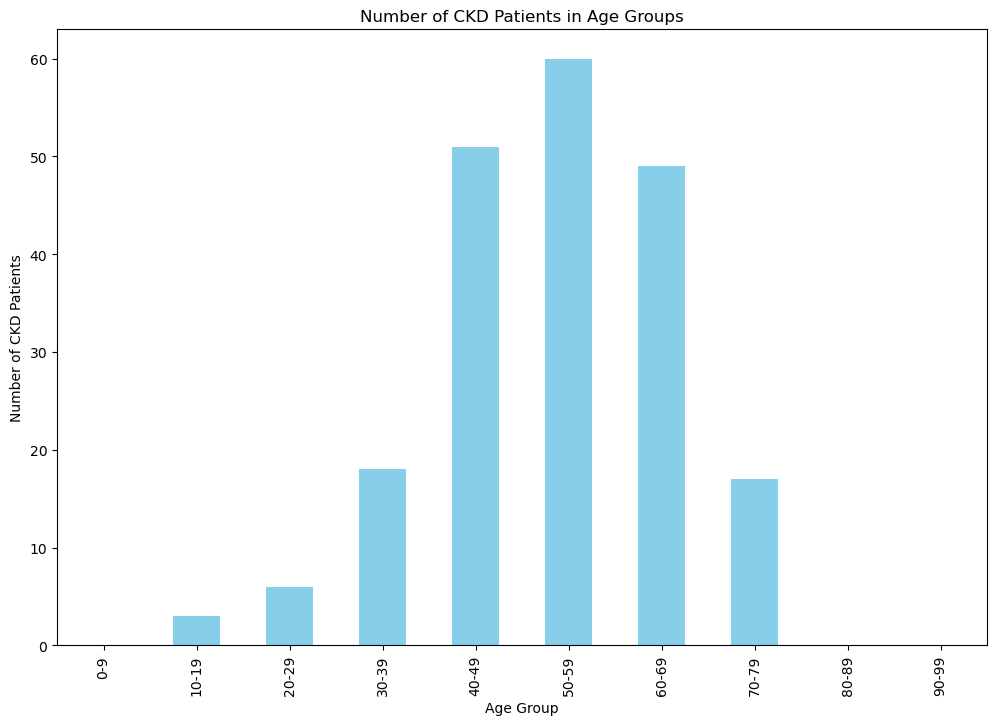

age_group
0-9       0
80-89     0
90-99     0
10-19     3
20-29     6
70-79    17
30-39    18
60-69    49
40-49    51
50-59    60
dtype: int64


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Define age groups with a 10-year gap
age_bins = range(0, 101, 10)

# Create a new column 'age_group' based on age bins
x_1['age_group'] = pd.cut(df['age'], bins=age_bins, labels=[f'{i}-{i+9}' for i in age_bins[:-1]])

# Count the number of CKD patients in each age group
ckd_counts = x_1[x_1['class'] == 1].groupby('age_group').size()

# Create a bar plot
plt.figure(figsize=(12, 8))
ckd_counts.plot(kind='bar', color='skyblue')
plt.title('Number of CKD Patients in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of CKD Patients')
plt.show()




ckd_counts_sorted = ckd_counts.sort_values(ascending=True)
print(ckd_counts_sorted)

# How gender is varying with age for x_1

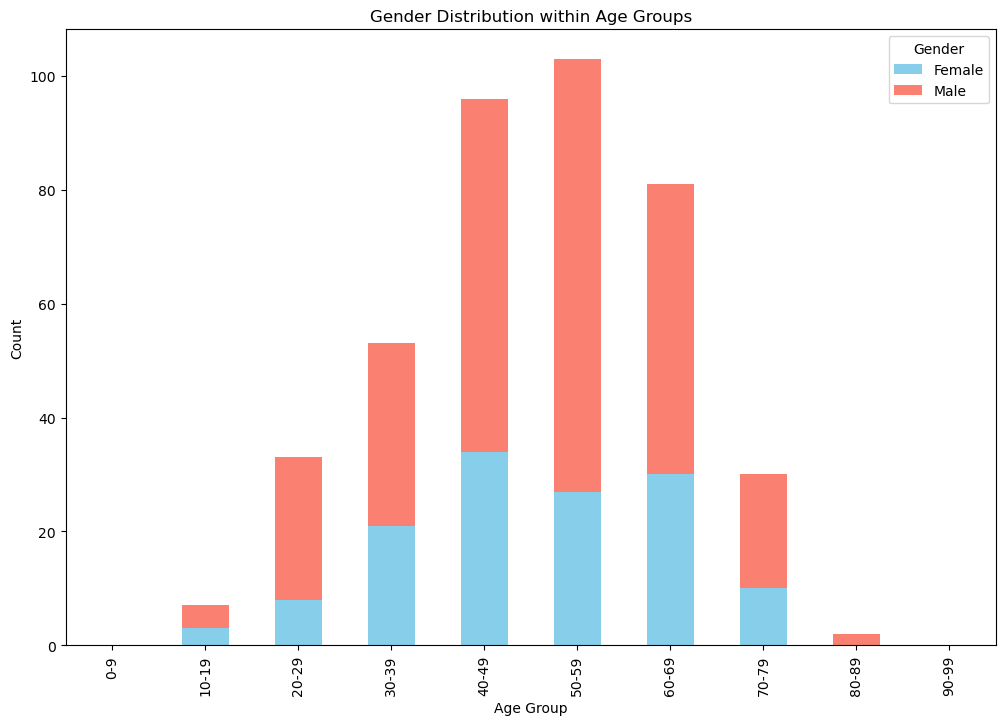

gender      0   1
age_group        
0-9         0   0
10-19       3   4
20-29       8  25
30-39      21  32
40-49      34  62
50-59      27  76
60-69      30  51
70-79      10  20
80-89       0   2
90-99       0   0


In [35]:
# Create a stacked bar plot
gender_age_counts = df.groupby(['age_group', 'gender']).size().unstack()
gender_age_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 8))

plt.title('Gender Distribution within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Display the counts in numbers
print(gender_age_counts)

# How weight is varying with ckd

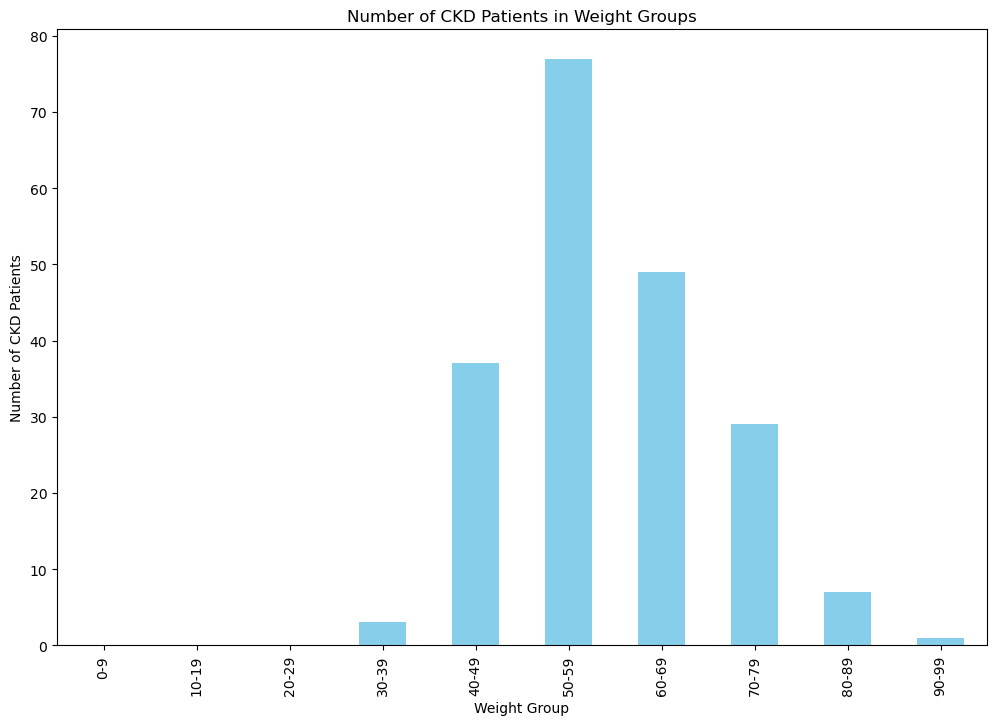

weight_group
0-9       0
10-19     0
20-29     0
90-99     1
30-39     3
80-89     7
70-79    29
40-49    37
60-69    49
50-59    77
dtype: int64


In [33]:
# Define weight groups with a 10-unit gap
weight_bins = range(0, 101, 10)

# Create a new column 'weight_group' based on weight bins
x_1['weight_group'] = pd.cut(x_1['weight'], bins=weight_bins, labels=[f'{i}-{i+9}' for i in weight_bins[:-1]])

# Count the number of CKD patients in each weight group
ckd_counts = x_1[x_1['class'] == 1].groupby('weight_group').size()

# Create a bar plot
plt.figure(figsize=(12, 8))
ckd_counts.plot(kind='bar', color='skyblue')
plt.title('Number of CKD Patients in Weight Groups')
plt.xlabel('Weight Group')
plt.ylabel('Number of CKD Patients')
plt.show()

# Display the counts in numbers
ckd_counts_sorted = ckd_counts.sort_values(ascending=True)
print(ckd_counts_sorted)


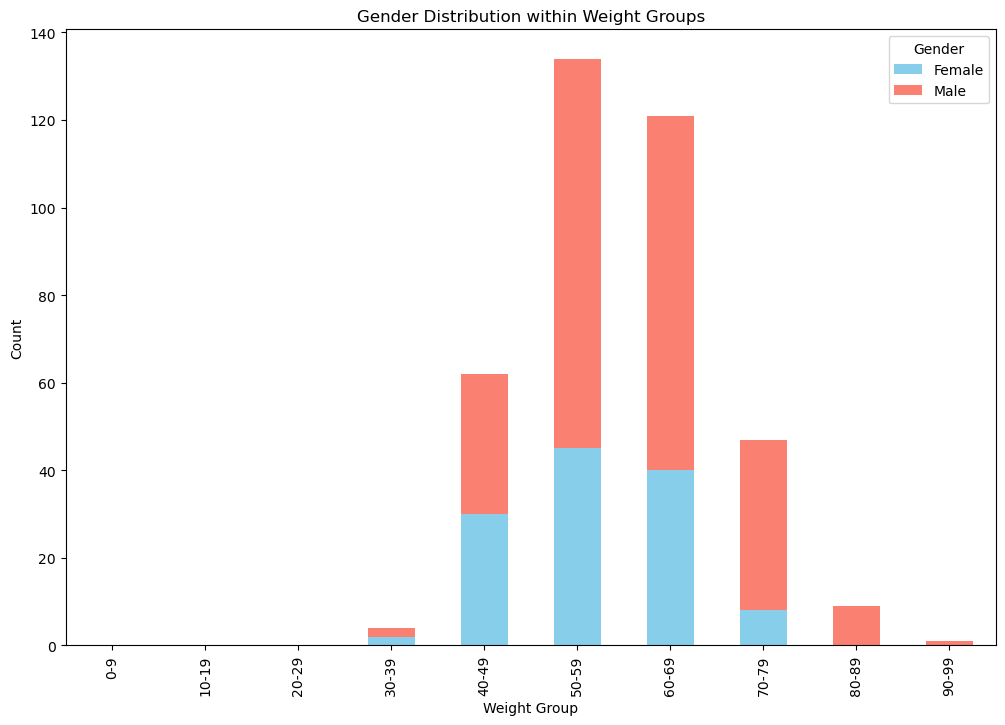

gender        0.0  1.0
weight_group          
0-9             0    0
10-19           0    0
20-29           0    0
30-39           2    2
40-49          30   32
50-59          45   89
60-69          40   81
70-79           8   39
80-89           0    9
90-99           0    1


In [38]:

# Count the number of patients in each gender within each weight group
gender_counts = x_1.groupby(['weight_group', 'gender']).size().unstack()

# Create a stacked bar plot
gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 8))

plt.title('Gender Distribution within Weight Groups')
plt.xlabel('Weight Group')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Display the counts in numbers
print(gender_counts)
